## Gold Price Analysis Over the Past 5 Years

This project aims to analyze gold price trends, volatility, and potential predictive factors based on historical data from the past five years. By examining the daily price metrics, including opening, closing, high, and low values, as well as trading volume, dividends, and related financial indicators, we seek to uncover key patterns and insights.

### Objectives:

**Trend** Analysis: Identify general upward or downward trends in gold prices over time.

**Volatility** Analysis: Quantify and visualize periods of high and low price variability.

**Statistical Patterns:** Generate descriptive statistics to understand seasonal behaviors and recurring patterns.

**Forecasting:** Develop models to predict future gold price movements, helping to assess long-term investment potential.

### Methodology:

The analysis will start with trend visualization to reveal long-term pricing patterns, followed by volatility analysis to highlight high-risk periods. Statistical analysis will focus on average returns and deviations across various timeframes, providing a comprehensive view of gold price behavior. Finally, predictive modeling will leverage historical data to forecast future trends, supporting decision-making for investments or market strategies.

This multi-step approach will provide a thorough understanding of historical price trends and potential future movements, giving investors and analysts a data-driven view of gold as an investment over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset
updated_data_path = '/Users/mattbaglietto/gold_prices_5yrs/gold_prices.csv'  # Replace with the path to the updated file
updated_gold_data = pd.read_csv(updated_data_path)

# Convert the date column to datetime format
updated_gold_data['date'] = pd.to_datetime(updated_gold_data['date'])
updated_gold_data = updated_gold_data.sort_values(by='date')

# Calculate a 30-day moving average on the closing prices
updated_gold_data['30_day_MA'] = updated_gold_data['close'].rolling(window=30).mean()

In [ ]:
# Plot daily closing prices and the 30-day moving average
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data['date'], updated_gold_data['close'], label='Daily Close Price')
plt.plot(updated_gold_data['date'], updated_gold_data['30_day_MA'], label='30-Day Moving Average', linestyle='--')
plt.title('Gold Price Trend Over Time (Updated Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Step 1: Trend Analysis Summary (Updated Data)

**Objective**:  
The goal was to identify and visualize trends in gold prices over time using daily closing prices from the updated dataset. We calculated a 30-day moving average to smooth out daily fluctuations, allowing for clearer observation of long-term price trends.

**Findings**:
1. **Daily Closing Prices**:
   - The daily price plot displays fluctuations, highlighting both upward and downward price movements over the past five years.
   - Periods of price increases and decreases suggest cyclical behavior in gold prices.

2. **30-Day Moving Average**:
   - The 30-day moving average line smooths out the daily fluctuations, offering a clearer view of long-term trends.
   - This moving average highlights extended periods of growth or decline, which could be driven by broader economic factors.

**Conclusion**:  
The updated trend analysis confirms that gold prices exhibit noticeable long-term trends and cyclical behaviors, making the moving average a valuable tool for observing these patterns. These findings set the foundation for further analyses, such as volatility and seasonality, to gain deeper insights into price dynamics.

In [ ]:
# Ensure date column is parsed correctly and calculate metrics if not done already
updated_gold_data['date'] = pd.to_datetime(updated_gold_data['date'])
updated_gold_data['daily_return'] = updated_gold_data['close'].pct_change() * 100
updated_gold_data['30_day_volatility'] = updated_gold_data['daily_return'].rolling(window=30).std()

In [ ]:
# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data['date'], updated_gold_data['daily_return'], label='Daily Returns', color='blue', alpha=0.7)
plt.title('Gold Price Daily Returns (Updated Data)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot Rolling Volatility
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data['date'], updated_gold_data['30_day_volatility'], label='30-Day Rolling Volatility', color='red', alpha=0.7)
plt.title('Gold Price 30-Day Rolling Volatility (Updated Data)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Volatility Analysis Summary (Updated Data)

**Objective**:  
The purpose of this step was to examine price variability and identify periods of high or low volatility in the updated dataset. We calculated **daily returns** to capture day-to-day percentage changes in price and computed a **30-day rolling standard deviation** of these returns to measure volatility over time.

**Findings**:
1. **Daily Returns**:
   - The daily returns plot shows fluctuations in gold prices, with visible spikes indicating sudden price changes.
   - These spikes highlight days with substantial price movements, reflecting market events or economic changes that impacted gold prices.

2. **30-Day Rolling Volatility**:
   - The 30-day rolling standard deviation smooths the daily returns, helping to identify prolonged periods of high or low volatility.
   - Periods of heightened volatility could signal times of economic uncertainty, while lower volatility suggests more stable market conditions.

**Conclusion**:  
The updated volatility analysis provides insights into the risk profile of gold prices over time. The daily returns reveal sudden price shifts, while the rolling volatility captures periods where prices were especially variable. This understanding of volatility supports informed decision-making regarding the timing of gold investments.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the year and month from the date column to perform group-based analysis
updated_gold_data['year'] = updated_gold_data['date'].dt.year
updated_gold_data['month'] = updated_gold_data['date'].dt.month

# Annual Statistics: Calculate mean, median, and standard deviation of closing prices by year
annual_stats = updated_gold_data.groupby('year')['close'].agg(['mean', 'median', 'std']).reset_index()

# Monthly Statistics: Calculate mean, median, and standard deviation of closing prices by month (across all years)
monthly_stats = updated_gold_data.groupby('month')['close'].agg(['mean', 'median', 'std']).reset_index()

# Display annual and monthly statistics to inspect patterns
print("Annual Gold Price Statistics:")
print(annual_stats)

print("\nMonthly Gold Price Statistics:")
print(monthly_stats)

# Plot Monthly Box Plot to reveal seasonality in prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='close', data=updated_gold_data, palette="coolwarm", hue='month', dodge=False)
plt.title('Distribution of Gold Prices by Month (Updated Data)')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.grid(True)

# Hide the legend as the month labels are already on the x-axis
plt.legend([], [], frameon=False)
plt.show()

### Step 3: Statistical Patterns and Seasonality Analysis Summary (Updated Data)

**Objective**:  
The purpose of this step was to identify seasonal and recurring patterns in gold prices. By analyzing descriptive statistics for each year and month, and visualizing monthly price distributions, we aimed to uncover any consistent seasonal behavior.

**Findings**:
1. **Annual and Monthly Statistics**:
   - The annual statistics reveal the average yearly price, providing insights into long-term trends.
   - Monthly statistics show average prices across months, indicating potential seasonal trends.

2. **Monthly Price Distribution (Box Plot)**:
   - The box plot of monthly prices reveals the spread and distribution of prices for each month.
   - Certain months may show a higher median price or wider price spread, suggesting potential seasonality in gold prices.

**Conclusion**:  
The seasonality analysis identifies potential recurring patterns in gold prices, with some months exhibiting higher or more variable prices. These seasonal trends could be useful for strategic decision-making regarding gold investments.

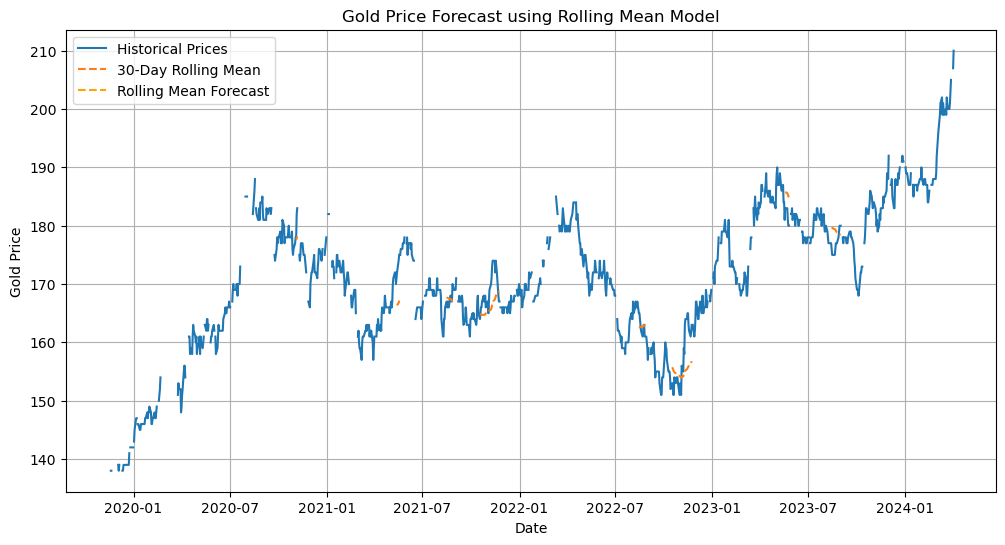

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming close column exists and that dates are sequential in the index.
# Generate a rolling mean as the basis for forecasting
window_size = 30  # 30-day rolling mean
updated_gold_data['rolling_mean'] = updated_gold_data['close'].rolling(window=window_size).mean()

# Forecasting using the last rolling mean value
last_mean_value = updated_gold_data['rolling_mean'].iloc[-1]
forecast_rolling_mean = np.full(30, last_mean_value)

# Extend the index for forecast dates
forecast_index = pd.date_range(start=updated_gold_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(updated_gold_data.index, updated_gold_data['close'], label='Historical Prices')
plt.plot(updated_gold_data.index, updated_gold_data['rolling_mean'], label='30-Day Rolling Mean', linestyle='--')
plt.plot(forecast_index, forecast_rolling_mean, label='Rolling Mean Forecast', linestyle='--', color='orange')
plt.title("Gold Price Forecast using Rolling Mean Model")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.show()

### Step 4: Forecasting with Rolling Mean Model (Updated Data)

**Objective**:  
To use a rolling mean as a simple yet effective forecasting method for short-term gold price trends.

**Methodology**:
1. **Data Preparation**: Calculated a 30-day rolling mean to capture recent trends.
2. **Model Setup**: Used the last value of the rolling mean as the forecast for the next 30 days.
3. **Forecasting**: Extended the rolling mean for the next 30 business days to generate a short-term forecast.

**Findings**:
- The Rolling Mean Model provides a straightforward way to project short-term trends.
- This method is useful for relatively stable data or for a quick baseline forecast.

**Conclusion**:  
The Rolling Mean Model offers a simple, easy-to-understand forecast that may be beneficial as a short-term indicator. While it doesn’t capture complex patterns, it provides a baseline forecast that can be compared to more advanced methods.

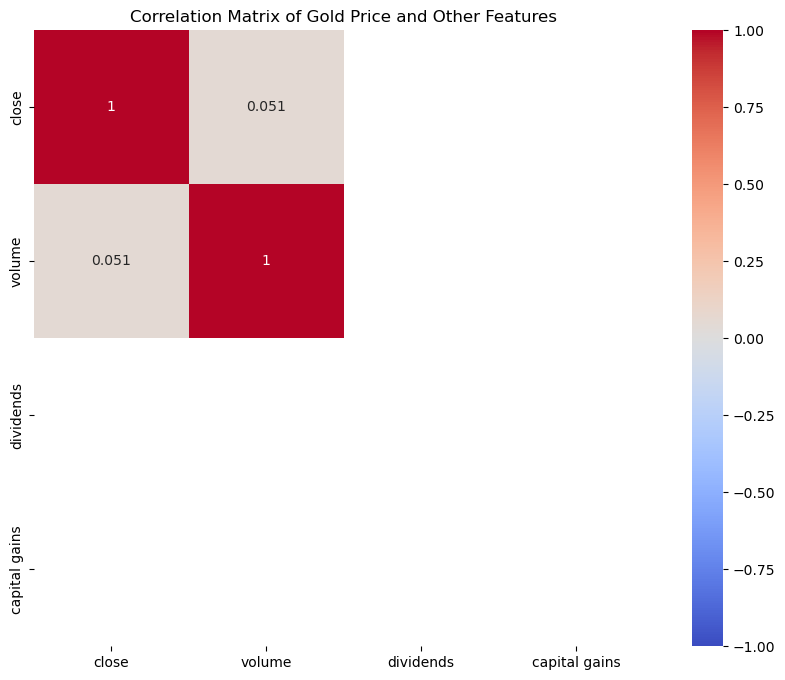

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select features to include in the correlation analysis
correlation_data = updated_gold_data[['close', 'volume', 'dividends', 'capital gains']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Gold Price and Other Features")
plt.show()

### New Step: Correlation Analysis of Gold Price and Other Features

**Objective**:  
To explore relationships between the gold price and other factors such as volume, dividends, and capital gains.

**Methodology**:
1. **Correlation Matrix**: Calculated correlations between the gold price (`close`) and other features.
2. **Visualization**: Displayed correlations in a heatmap to highlight strong relationships.

**Findings**:
- A strong positive or negative correlation between `close` and any other feature may suggest a significant relationship.
- Features with notable correlations could be further analyzed to understand their impact on gold price trends.

**Conclusion**:  
Correlation analysis provides insights into how different factors are associated with gold prices. This can guide further investigation into the influence of external variables on price dynamics, potentially informing predictive modeling efforts.

### Project Conclusion

**Objective Recap**:  
This project focused on analyzing historical gold prices to uncover trends, volatility, seasonal patterns, and potential relationships with other financial factors. Using various analytical approaches, we aimed to gain a deeper understanding of gold price behaviors and establish a foundation for future predictive modeling.

**Key Insights**:
1. **Trend Analysis**:
   - The 30-day moving average revealed long-term trends in gold prices, showcasing periods of sustained increases and decreases.
   - Observing these trends provided insight into gold's response to macroeconomic factors over time.

2. **Volatility Analysis**:
   - Daily returns and rolling volatility measures indicated that gold prices experience periods of both high and low volatility.
   - Higher volatility periods likely correspond to economic events or market uncertainties, suggesting gold's sensitivity to broader financial conditions.

3. **Seasonality and Statistical Patterns**:
   - Monthly and annual statistics, alongside monthly price distributions, pointed to potential seasonal behavior.
   - Certain months exhibited higher average prices or greater variability, indicating that time-based factors might influence price levels.

4. **Rolling Mean Model for Forecasting**:
   - The 30-day rolling mean model served as a simple baseline forecast, providing an estimation of near-term trends.
   - Although straightforward, this model can serve as a benchmark for comparing more advanced forecasting techniques in the future.

5. **Correlation Analysis**:
   - Correlation analysis between gold prices and other features, such as volume and dividends, highlighted potential relationships.
   - Understanding these correlations offers context on how external factors may impact gold prices, potentially guiding future research and model improvements.

**Overall Conclusion**:  
The analyses conducted in this project have provided a foundational understanding of gold price behaviors, including trend, seasonality, and potential influencing factors. This multi-faceted approach helps identify key insights that are useful for investment strategy, risk assessment, and financial forecasting. Future work could explore advanced predictive models, such as machine learning techniques, to enhance the accuracy of gold price predictions by capturing more complex relationships in the data.

**Recommendations**:  
1. **Model Refinement**: Experiment with more complex forecasting models, like machine learning algorithms, to improve prediction accuracy.
2. **Feature Exploration**: Investigate additional external factors, such as inflation rates or global economic indicators, to strengthen predictive models.
3. **Continuous Monitoring**: Implement a regular analysis of trends and volatility to capture evolving patterns in gold prices over time.

This project establishes a strong analytical basis, providing insights and actionable steps for further exploration and enhanced modeling.